In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
trusted_urls = pd.read_csv("trusted-urls.csv")
phishing_urls = pd.read_csv("phishing-urls.csv")

In [3]:
dataset = trusted_urls.append(phishing_urls,ignore_index=True)
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [4]:
dataset.head()

,Having_@_symbol,Having_IP,Prefix_suffix_separation,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,statistical_report,tiny_url,web_traffic,label
0,0,0,1,0,2,2,1,1,1,0,1,0,1,1
1,0,0,0,0,0,0,1,1,1,0,1,0,1,1
2,0,0,0,0,1,2,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,0,0,0,0,0
4,0,0,0,0,0,2,1,1,1,0,0,0,2,1


In [5]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

In [6]:
import random
random.seed(100)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)
print(len(x_train),len(x_test),len(y_train),len(y_test))

1609 403 1609 403


In [7]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [9]:
print(classification_report(y_test, svclassifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       223
           1       0.83      0.76      0.79       180

    accuracy                           0.82       403
   macro avg       0.82      0.82      0.82       403
weighted avg       0.82      0.82      0.82       403



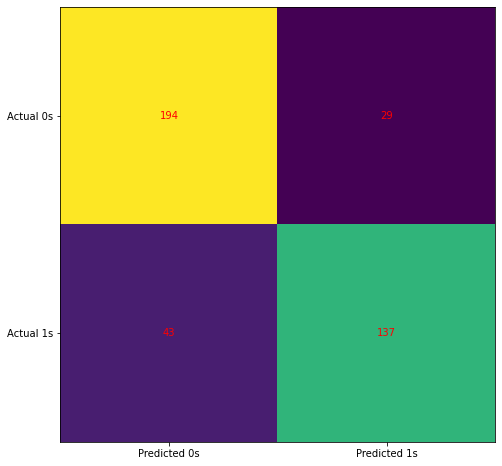

In [11]:
cm = confusion_matrix(y_test, svclassifier.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [13]:
# Saving the model to a file
import pickle
file_name = "SVC_Model.sav"
pickle.dump(svclassifier,open(file_name,'wb'))